In [48]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 30 seconds


In [49]:
df = pd.read_excel("data60.xlsx")
df

,ResponseId,Country,cond,condName,Intervention_order,Intro_Timer,Intervention_Timer,BELIEFcc,POLICYcc,SHAREcc,...,Trust_sci1_1.1,control_timer2_First Click,control_timer2_Last Click,control_timer2_Page Submit,control_timer2_Click Count,Trust_sci2_1.1,control_timer3_First Click,control_timer3_Last Click,control_timer3_Page Submit,control_timer3_Click Count
0,R_0031kFvKFnFD4E9,Israel,7,PsychDistance,SocialmediasharingPipedText|PolicySupport|Beli...,4.801,104.031,92.75,86.888889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R_0059fW1EtKYsTWV,Brazil,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,11.155,198.395,100.00,100.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R_00688n4RYG3zIel,Macedonia,10,DynamicNorm,SocialmediasharingPipedText|PolicySupport|Beli...,29.154,83.853,100.00,54.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R_0086kfWbVfurc1H,France,8,PluralIgnorance,PolicySupport|SocialmediasharingPipedText|Beli...,8.301,29.399,80.25,85.222222,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R_00B8XyVmrMofqGB,UK,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,17.951,148.918,51.00,48.777778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54653,R_zZMtNlzas0E8RyN,Slovakia,9,LetterFuture,BeliefinAnthrCC|PolicySupport|Socialmediashari...,31.481,316.675,98.50,91.333333,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54654,R_zZPllZfBJWjfSCZ,Switzerland,9,LetterFuture,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,5.627,206.393,63.00,47.444444,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54655,R_zZPOdDw0XWugcH7,Israel,10,DynamicNorm,PolicySupport|SocialmediasharingPipedText|Beli...,16.698,104.157,98.75,63.888889,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54656,R_zZpwx0yCZNh32ql,Algeria,10,DynamicNorm,BeliefinAnthrCC|PolicySupport|Socialmediashari...,17.577,79.966,13.75,25.750000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
samplesize = df.loc[:, ["ResponseId", "Country"]].groupby("Country").count().reset_index().rename(columns={"ResponseId": "N", "Country": "name"})

In [51]:
df['ide'] = (df['Politics2_1'] + df['Politics2_9'])/2
df

,ResponseId,Country,cond,condName,Intervention_order,Intro_Timer,Intervention_Timer,BELIEFcc,POLICYcc,SHAREcc,...,control_timer2_First Click,control_timer2_Last Click,control_timer2_Page Submit,control_timer2_Click Count,Trust_sci2_1.1,control_timer3_First Click,control_timer3_Last Click,control_timer3_Page Submit,control_timer3_Click Count,ide
0,R_0031kFvKFnFD4E9,Israel,7,PsychDistance,SocialmediasharingPipedText|PolicySupport|Beli...,4.801,104.031,92.75,86.888889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0
1,R_0059fW1EtKYsTWV,Brazil,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,11.155,198.395,100.00,100.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
2,R_00688n4RYG3zIel,Macedonia,10,DynamicNorm,SocialmediasharingPipedText|PolicySupport|Beli...,29.154,83.853,100.00,54.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
3,R_0086kfWbVfurc1H,France,8,PluralIgnorance,PolicySupport|SocialmediasharingPipedText|Beli...,8.301,29.399,80.25,85.222222,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R_00B8XyVmrMofqGB,UK,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,17.951,148.918,51.00,48.777778,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54653,R_zZMtNlzas0E8RyN,Slovakia,9,LetterFuture,BeliefinAnthrCC|PolicySupport|Socialmediashari...,31.481,316.675,98.50,91.333333,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
54654,R_zZPllZfBJWjfSCZ,Switzerland,9,LetterFuture,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,5.627,206.393,63.00,47.444444,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.5
54655,R_zZPOdDw0XWugcH7,Israel,10,DynamicNorm,PolicySupport|SocialmediasharingPipedText|Beli...,16.698,104.157,98.75,63.888889,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.5
54656,R_zZpwx0yCZNh32ql,Algeria,10,DynamicNorm,BeliefinAnthrCC|PolicySupport|Socialmediashari...,17.577,79.966,13.75,25.750000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0


In [52]:
# Global median split
# df["Ideology"] = (df["Politics2_1"] > df["Politics2_1"].median()).astype(int)

# Per-country median split
new = []
for _, sub in df.groupby("Country"):
    sub.loc[:, "Ideology"] = (sub.loc[:, "ide"] > sub.loc[:, "ide"].median()).astype(float)
    # Ensure NaN ideology when Politics2_1 is NaN
    sub.loc[sub.Politics2_1.isna(), "Ideology"] = np.NaN
    new.append(sub)
df = pd.concat(new)
# Replace 1 with "Conservative" and 0 with "Liberal"
df['Ideology'] = df['Ideology'].replace(1, 'Conservative').replace(0, 'Liberal')

In [53]:
#transform the datafram from wide format to long format

df_z = pd.melt(
    df.loc[:, ['ResponseId', "Country", "condName", "cond", "Ideology","ide", "BELIEFcc", "WEPTcc"]],
    id_vars=['ResponseId', "Country", "condName",  "Ideology","ide", "cond"],
    var_name="Type",
    value_name="score"
)

df_z_control=df_z.query('cond==1')
df_control = df.query('cond==1')

# Figure 1

<IPython.core.display.Javascript object>


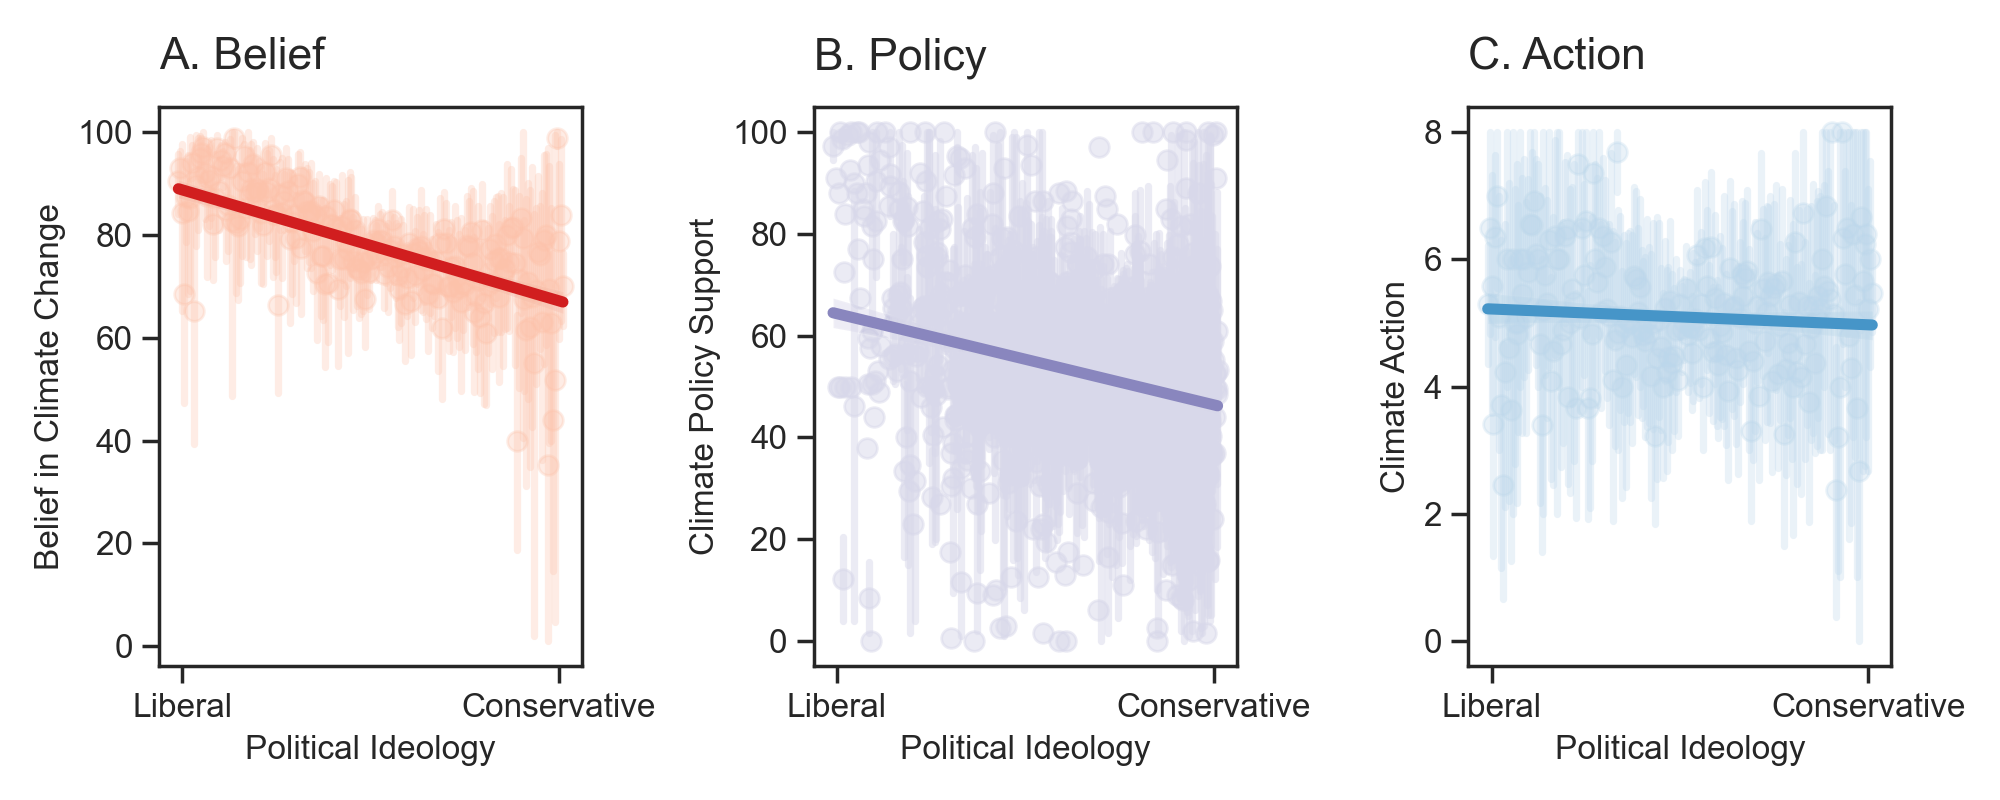

In [54]:
fig, ax = plt.subplots(1,3, figsize=(10,4))

sns.regplot(y=df_control.BELIEFcc, x=df_control.ide, scatter_kws={"color": "#FCC2AA","alpha":.3}, \
            line_kws={"color":"#D11E1F","alpha":1,"lw":4},x_estimator=np.mean, ax=ax[0])
sns.regplot(x=df_control.POLICYcc, y=df_control.ide, scatter_kws={"color": "#D8D8EA","alpha":.5}, \
            line_kws={"color":"#8986BE", "linewidth": 4}, x_estimator=np.mean, ax=ax[1])
sns.regplot(y=df_control.WEPTcc, x=df_control.ide, scatter_kws={"color": "#BCD7EB","alpha":.3}, \
            line_kws={"color":"#4695C8","alpha":1,"lw":4} ,x_estimator=np.mean, ax=ax[2])

ax[0].set_ylabel('Belief in Climate Change')
ax[0].set_xticks([1, 99])
ax[0].set_xticklabels(['Liberal', 'Conservative'])
ax[0].set_xlabel('Political Ideology')

ax[2].set_xticks([1, 99])
ax[2].set_xticklabels(['Liberal', 'Conservative'])
ax[2].set_ylabel('Climate Action')
ax[2].set_xlabel('Political Ideology')

ax[1].set_xlabel('Political Ideology')
# ax[1].set_ylim([-1.01,1])
ax[1].set_ylabel('Climate Policy Support')
ax[1].set_xticks([1, 99])
ax[1].set_xticklabels(['Liberal', 'Conservative'])

bff.panellabel(ax[0], "A. Belief")
bff.panellabel(ax[1], "B. Policy")
bff.panellabel(ax[2], "C. Action")
plt.tight_layout()
# plt.savefig('Fig1.jpeg', dpi=500, format="jpeg")

# Figure 2

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['BELIEFcc', 'WEPTcc']] = scaler.fit_transform(df[['BELIEFcc', 'WEPTcc']])

df_z = pd.melt(
    df.loc[:, ['ResponseId', "Country", "condName", "cond", "Ideology","ide", "BELIEFcc", "WEPTcc"]],
    id_vars=['ResponseId', "Country", "condName",  "Ideology","ide", "cond"],
    var_name="Type",
    value_name="score"
)

df_z_control=df_z.query('cond==1')

<IPython.core.display.Javascript object>


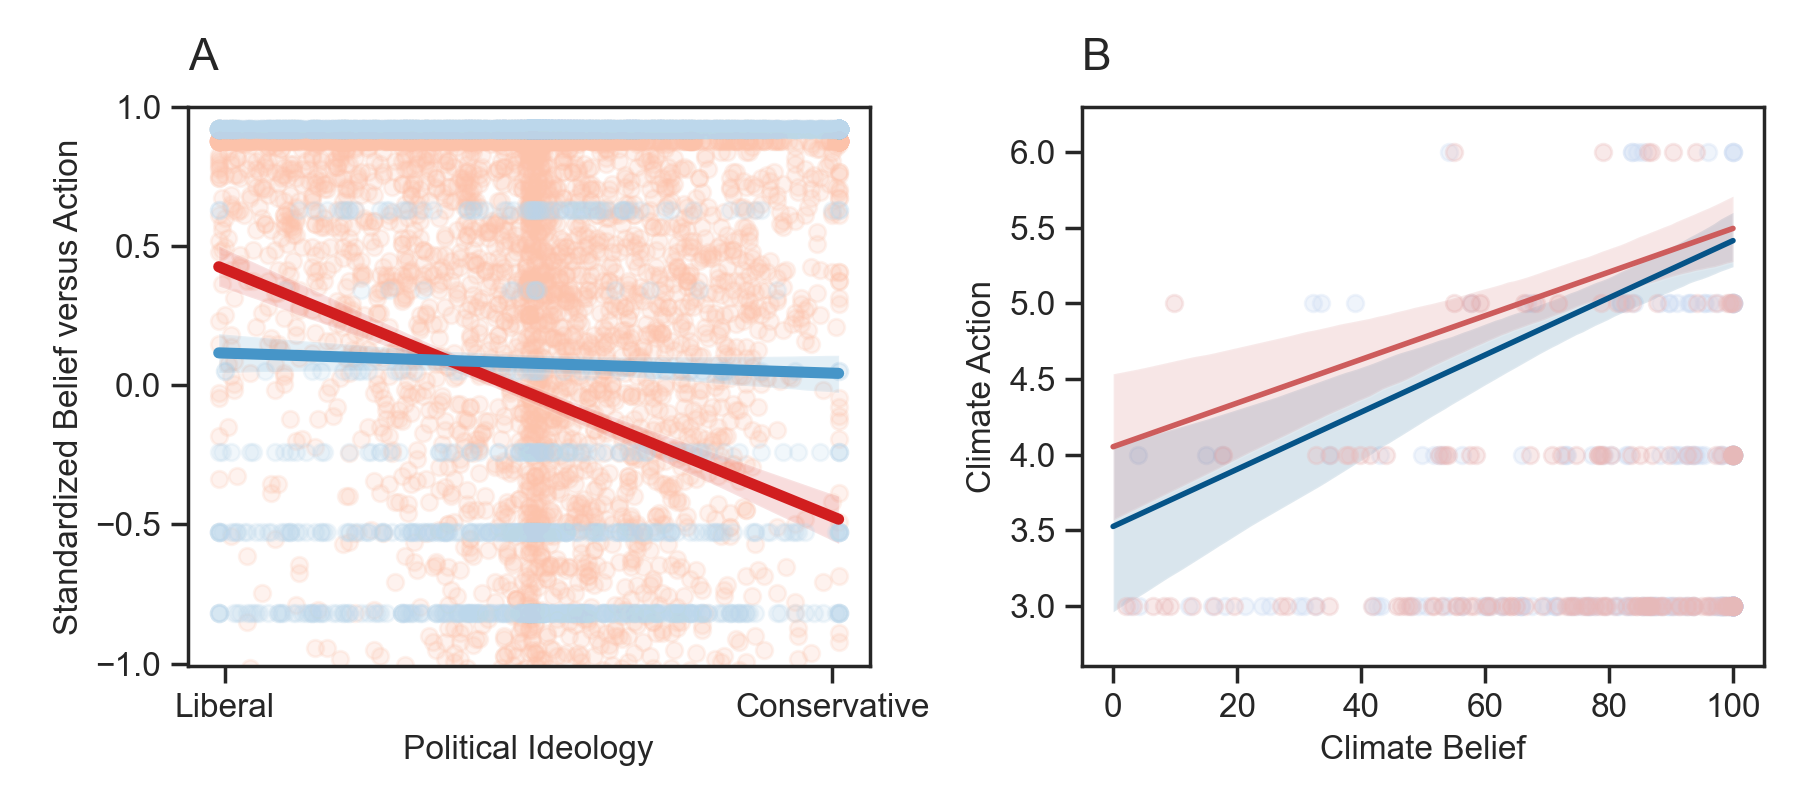

In [56]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.regplot(x=df_z_control.query("Type == 'BELIEFcc'")['ide'], y=df_z_control.query("Type == 'BELIEFcc'")['score'], scatter_kws={"color": "#FCC2AA","alpha":.2}, \
            line_kws={"color":"#D11E1F", "linewidth": 4}, ax=ax[0])
sns.regplot(x=df_z_control.query("Type == 'WEPTcc'")['ide'], y=df_z_control.query("Type == 'WEPTcc'")['score'],  scatter_kws={"color": "#BCD7EB","alpha":.2}, \
            line_kws={"color":"#4695C8", "linewidth": 4}, ax=ax[0])

sns.regplot(x=df_control.query("Ideology == 'Liberal'")['BELIEFcc'], y=df_control.query("Ideology == 'Liberal'")['WEPTcc'], scatter_kws={"color": "#CDDCF3","alpha":.3}, \
            line_kws={"color":"#065488","alpha":1,"lw":2}, ax=ax[1])
sns.regplot(x=df_control.query("Ideology == 'Conservative'")['BELIEFcc'], y=df_control.query("Ideology == 'Conservative'")['WEPTcc'],  scatter_kws={"color": "#E9B9B9","alpha":.3}, \
            line_kws={"color":"#CD5C5C","alpha":1,"lw":2}, ax=ax[1])

ax[0].set_xlabel('Political Ideology')
ax[0].set_ylim([-1.01,1])
ax[0].set_ylabel('Standardized Belief versus Action')
ax[0].set_xticks([1, 99])
ax[0].set_xticklabels(['Liberal', 'Conservative'])
# ax[0].legend(['Climate Belief', 'Climate Action'])

ax[1].set_ylabel('Climate Action')
ax[1].set_xlabel('Climate Belief')
ax[1].set_ylim(2.6,6.3)
# plt.legend(['Liberal', 'Conservative'], loc='upper left')

bff.panellabel(ax[0], "A")
bff.panellabel(ax[1], "B")

plt.tight_layout()
# plt.savefig('Fig3.jpeg', dpi=500, format="jpeg")

# Figure 3

In [57]:
# Iterate over sub-dataframes of each Country
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["BELIEFcc"].mean())
        var.append(subgroup["BELIEFcc"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "BELIEFcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="BELIEFcc", ascending=False)

<IPython.core.display.Javascript object>


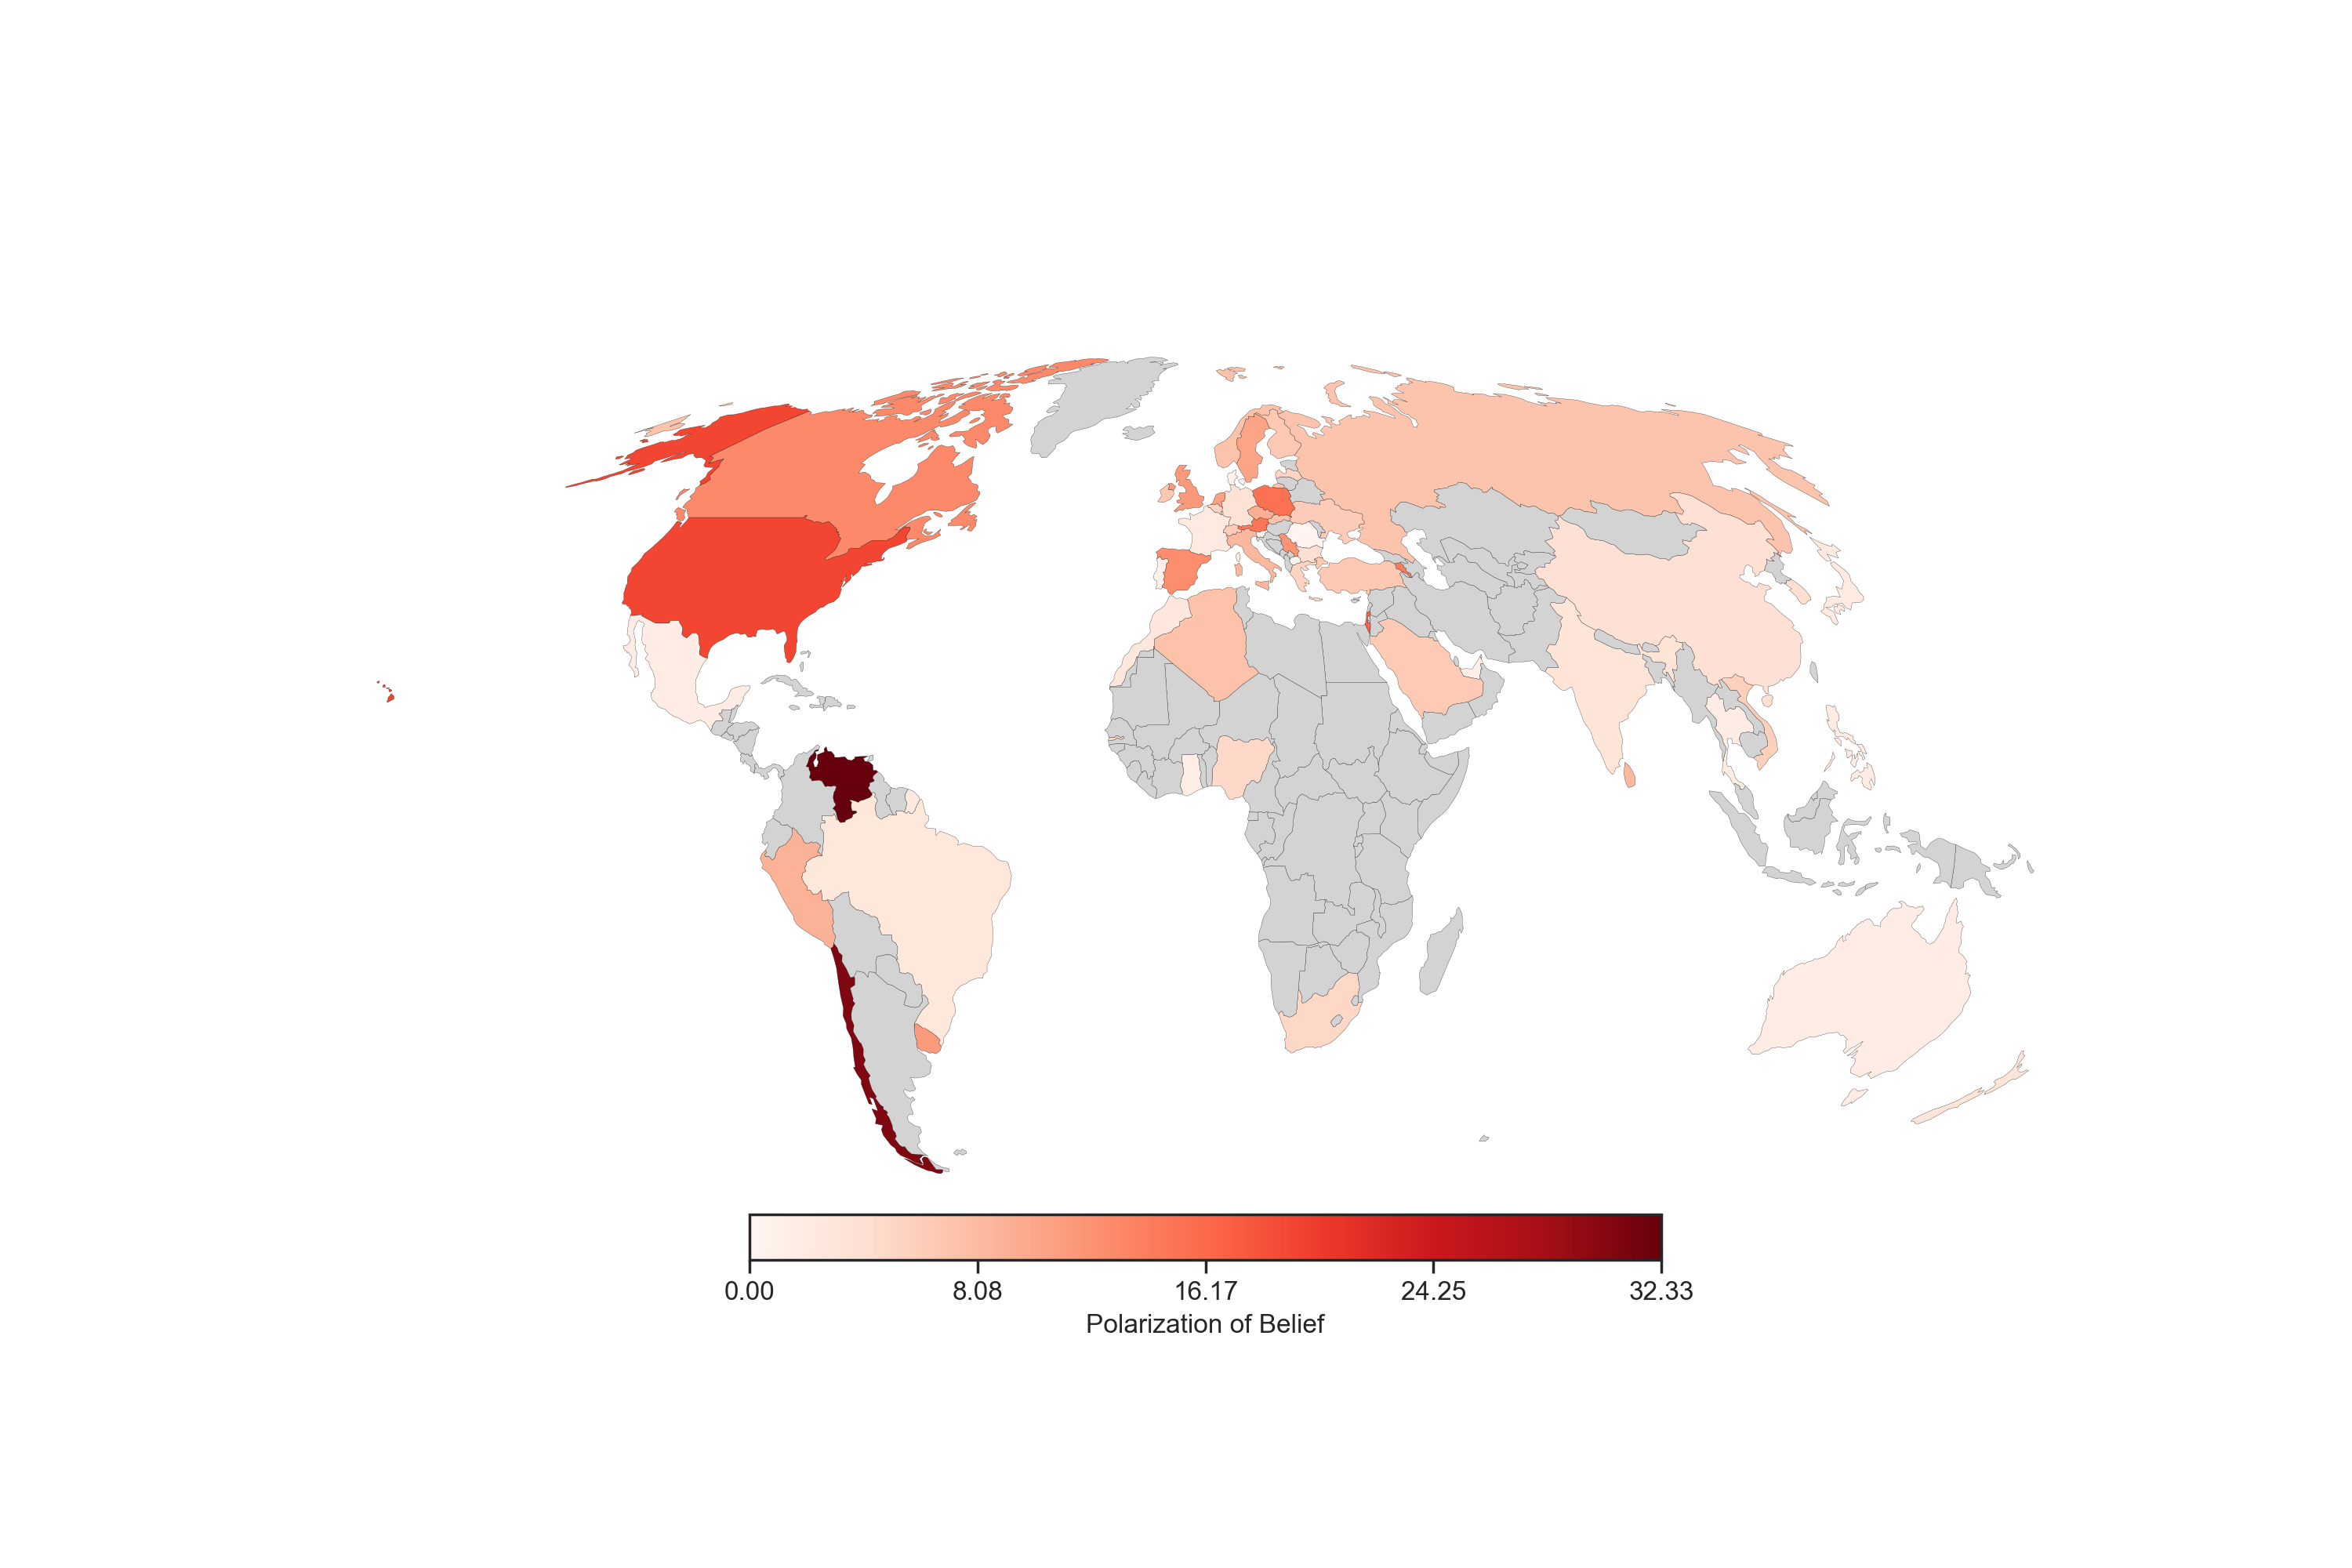

In [58]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]

strip_excess = np.vectorize(lambda x: x[2:-1])
dfdiff.replace({'Russian Federation':'Russia',
                'UK':'United Kingdom',
                'Macedonia':'North Macedonia',
                'SriLanka': 'Sri Lanka',
                'USA': 'United States of America'}, inplace=True)
dfdiff["name"] = dfdiff["Country"]
dfdiff["absdifference"] = dfdiff["BELIEFcc"].abs()

data_world = pd.merge(world, dfdiff, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())

fig, ax = plt.subplots(1, 1, figsize=(15,10))

temp = data_world.plot(
    ax=ax,
    column="absdifference",
    legend=True,
    legend_kwds={'label': "Polarization of Belief",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                #  'ticks': np.linspace(data_world.BELIEFcc.min(), data_world.BELIEFcc.max(), 5),
                 'ticks': np.linspace(0., data_world.absdifference.max(), 5),
                 'pad': 0.},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0.,
    cmap='Reds',
    edgecolor='black',
    linewidth=0.1,
)
temp.set_axis_off()
plt.savefig('map_polarization_belief.png', dpi = 500)

# Fig 3B

In [59]:
# Iterate over sub-dataframes of each Country
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["POLICYcc"].mean())
        var.append(subgroup["POLICYcc"].var())
    if len(n) == 2:
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "POLICYcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="POLICYcc", ascending=False)

<IPython.core.display.Javascript object>


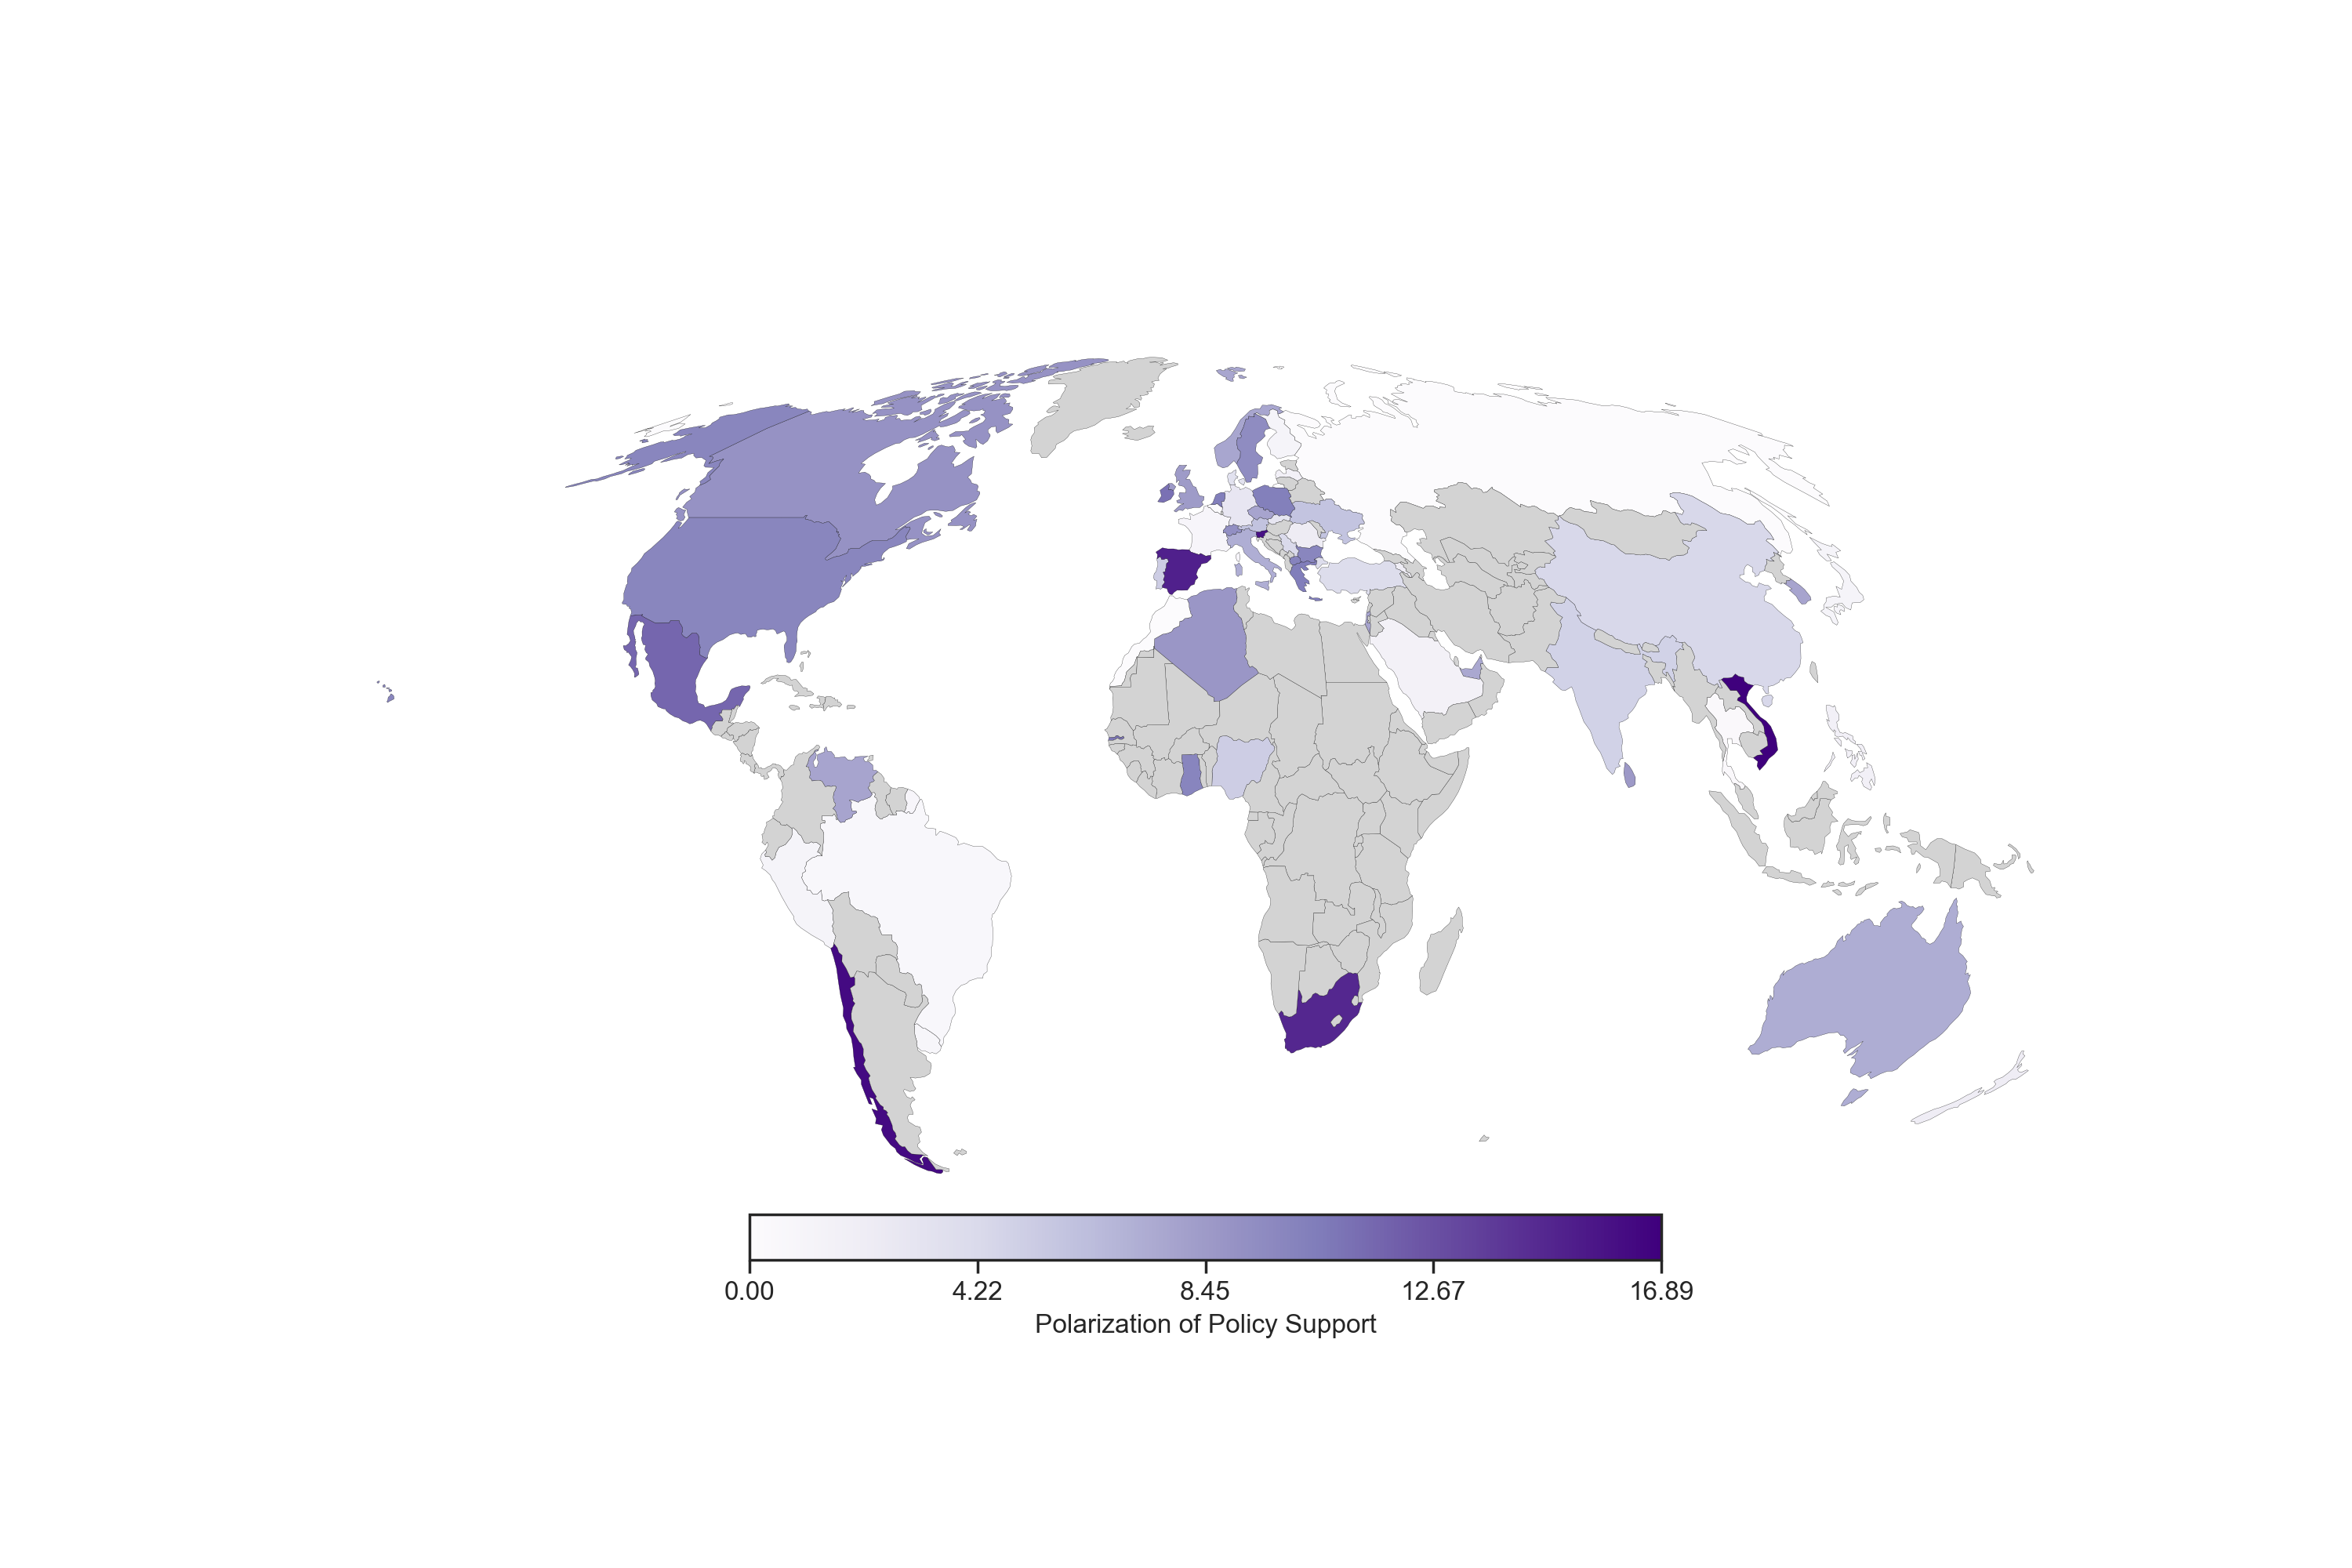

In [60]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]
strip_excess = np.vectorize(lambda x: x[2:-1])
dfdiff.replace({'Russian Federation':'Russia',
                'UK':'United Kingdom',
                'Macedonia':'North Macedonia',
                'SriLanka': 'Sri Lanka',
                'USA': 'United States of America'}, inplace=True)
dfdiff["name"] = dfdiff["Country"]
dfdiff["absdifference"] = dfdiff["POLICYcc"].abs()
data_world = pd.merge(world, dfdiff, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())
fig, ax = plt.subplots(1, 1, figsize=(15,10))
temp = data_world.plot(
    ax=ax,
    column="absdifference",
    legend=True,
    legend_kwds={'label': "Polarization of Policy Support",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                 'ticks': np.linspace(0., data_world.absdifference.max(), 5),
                 'pad': 0.},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0.,
    cmap='Purples',
    edgecolor='black',
    linewidth=0.1,
)
temp.set_axis_off()
plt.savefig('map_polarization_policy.png', dpi = 500)

# Fig 3C

In [61]:
# Iterate over sub-dataframes of each Country
records = []
for groupid, group in df_control.groupby("Country"):
    # Collect sample size, mean, and var for each Ideology
    n, mean, var = [], [], []
    # Drop NaN ideology and sort by ideology; Conservative will always come FIRST
    group = group.dropna(subset=["Ideology"]).sort_values(by="Ideology")
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ideology
    for subgroupid, subgroup in group.groupby("Ideology"):
        n.append(subgroup.shape[0])
        mean.append(subgroup["WEPTcc"].mean())
        var.append(subgroup["WEPTcc"].var())
    if len(n) == 2:
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "WEPTcc": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="WEPTcc", ascending=False)

<IPython.core.display.Javascript object>


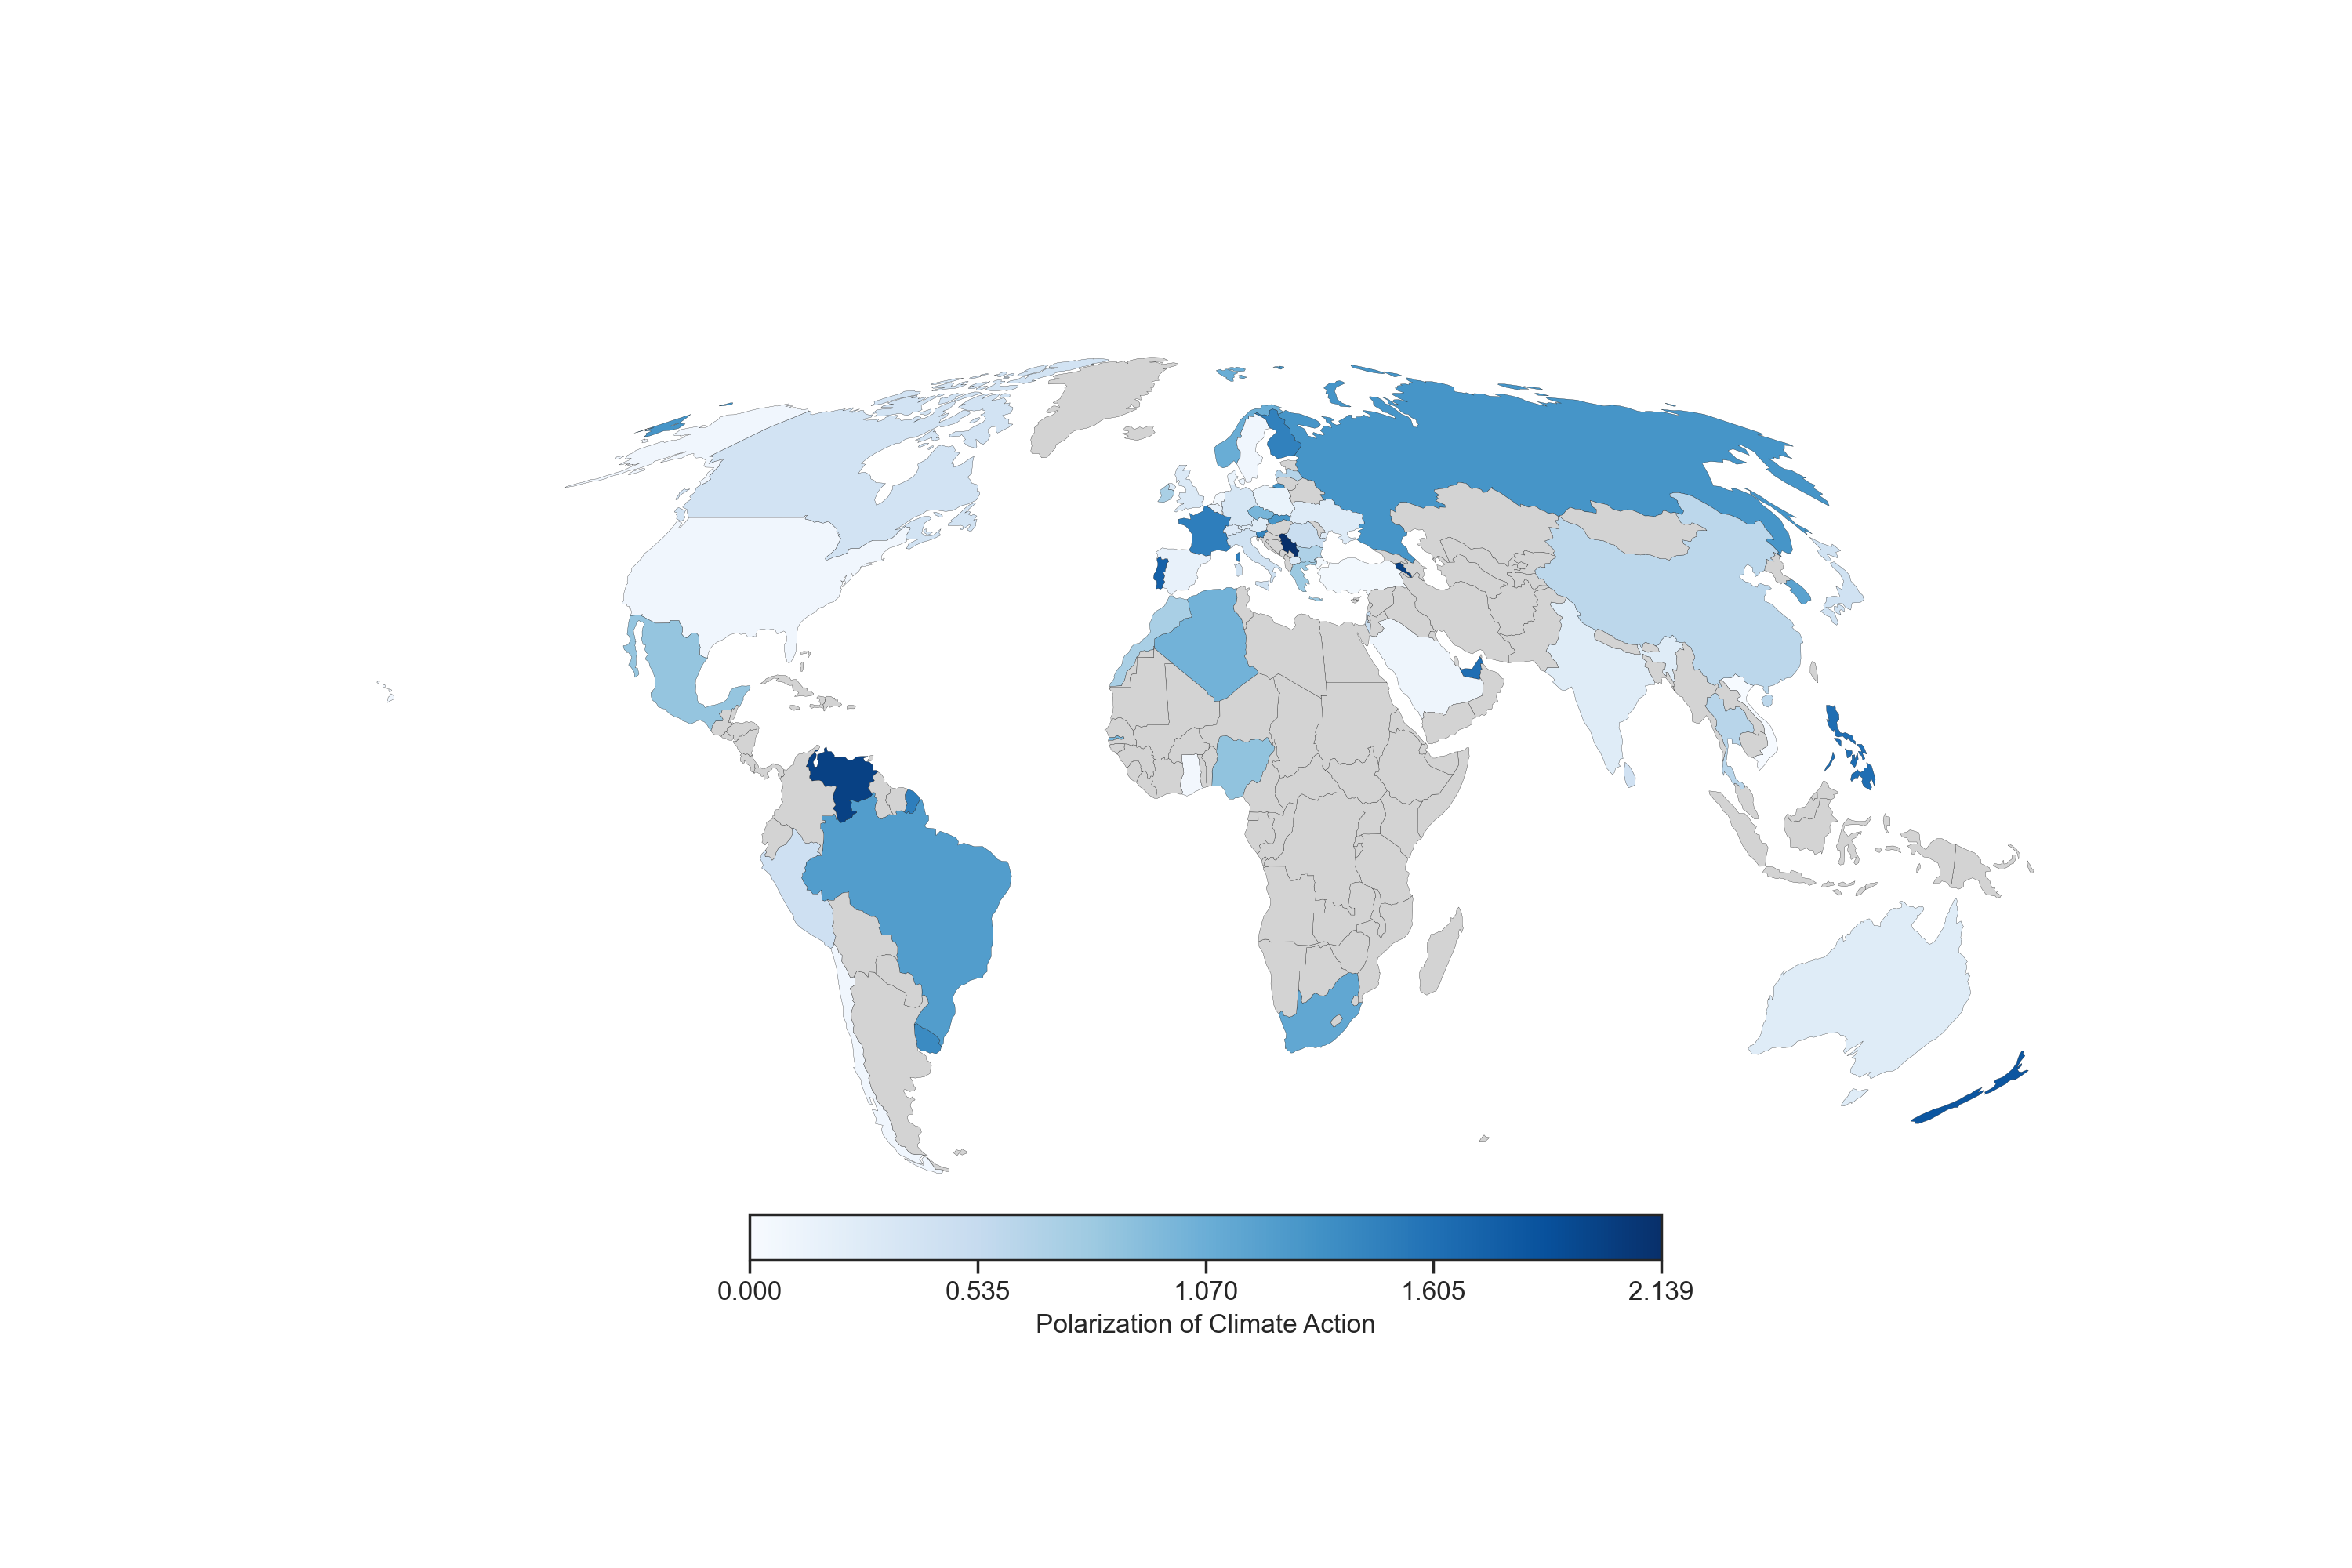

In [62]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]
world = world.to_crs(ccrs.Mollweide().proj4_init)
world = world.cx[world.bounds.minx.min()*.8:world.bounds.maxx.max()*.8, world.bounds.miny.min():world.bounds.maxy.max()]
strip_excess = np.vectorize(lambda x: x[2:-1])
dfdiff.replace({'Russian Federation':'Russia',
                'UK':'United Kingdom',
                'Macedonia':'North Macedonia',
                'SriLanka': 'Sri Lanka',
                'USA': 'United States of America'}, inplace=True)
dfdiff["name"] = dfdiff["Country"]
dfdiff["absdifference"] = dfdiff["WEPTcc"].abs()
data_world = pd.merge(world, dfdiff, left_on='name', right_on='name', how='left')
data_world = data_world.to_crs(ccrs.Mollweide())
fig, ax = plt.subplots(1, 1, figsize=(15,10))
temp = data_world.plot(
    ax=ax,
    column="absdifference",
    legend=True,
    legend_kwds={'label': "Polarization of Climate Action",
                 'shrink': 0.5,  
                 'aspect': 20,
                 'location': 'bottom',
                 'ticks': np.linspace(0., data_world.absdifference.max(), 5),
                 'pad': 0.},
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
    vmin=0.,
    cmap='Blues',
    edgecolor='black',
    linewidth=0.1,
)
temp.set_axis_off()
plt.savefig('map_polarization_action.png', dpi = 500)

# FIGURE 4

<IPython.core.display.Javascript object>


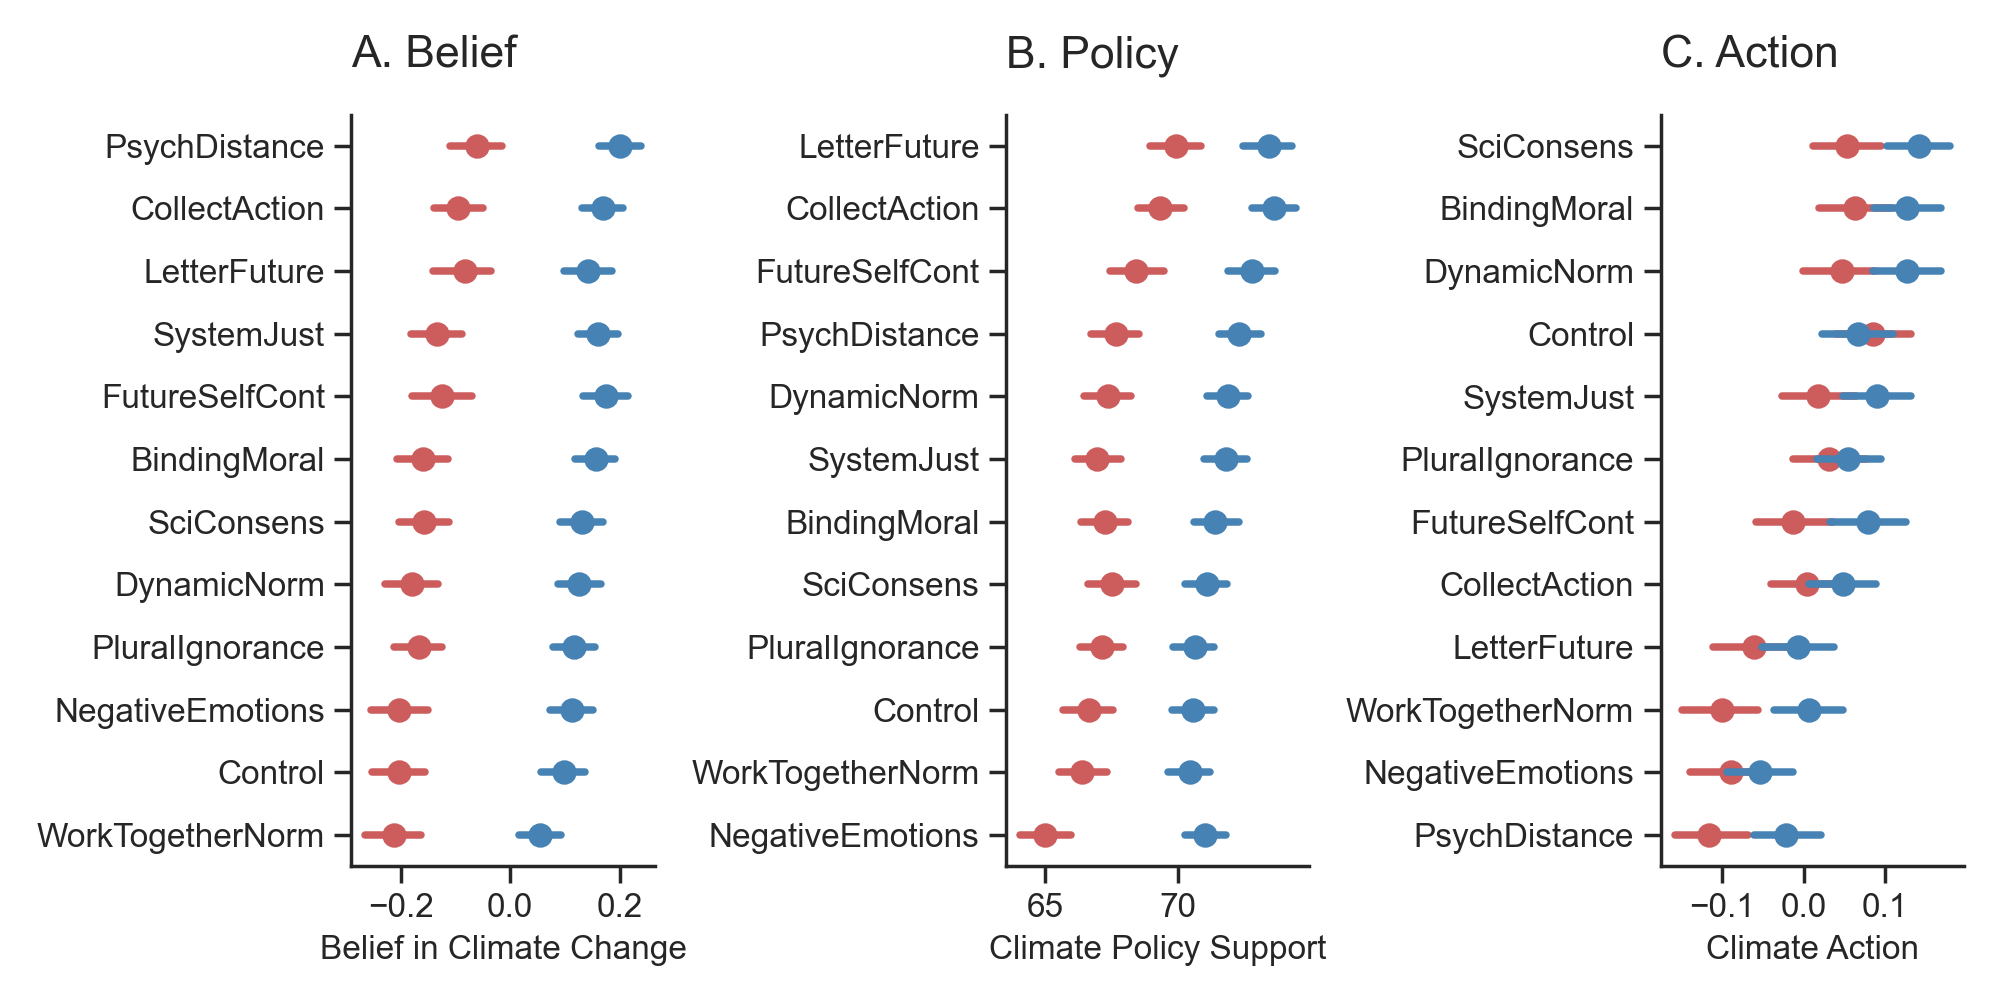

In [63]:
pal = ["#CD5C5C", '#4682B4']
fig, ax = plt.subplots(1,3, figsize=(10,5))

order1 = df.groupby("condName").agg("mean")["BELIEFcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.BELIEFcc,  hue=df.Ideology, data=df, orient="h", \
            palette=pal, join=False, \
            order= order1, ax=ax[0])

order2 = df.groupby("condName").agg("mean")["POLICYcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.POLICYcc,  hue=df.Ideology, data=df, orient="h", \
            palette=pal, join=False, \
            order= order2, ax=ax[1])

order3 = df.groupby("condName").agg("mean")["WEPTcc"].sort_values(ascending=False).index
sns.pointplot(y=df.condName, x=df.WEPTcc,  hue=df.Ideology, data=df, orient="h", \
            palette=pal, join=False, \
            order= order3, ax=ax[2])
ax[0].set_ylabel("")
ax[0].set_xlabel("Belief in Climate Change")

ax[1].set_ylabel("")
ax[1].set_xlabel("Climate Policy Support")

ax[2].set_ylabel("")
ax[2].set_xlabel("Climate Action")

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
bff.panellabel(ax[0], "A. Belief")
bff.panellabel(ax[1], "B. Policy")
bff.panellabel(ax[2], "C. Action")
sns.despine()
plt.tight_layout()
plt.savefig('Fig3.jpeg', dpi=900, format="jpeg")